In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('social_ads.csv')

In [3]:
df.columns = ['Unnamed: 0', 'segment', 'google', 'facebook', 'instagram', 'unit_sold', 'size', 'is_large', 'area', 'area_suburban', 'area_urban']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     200 non-null    int64  
 1   segment        200 non-null    int64  
 2   google         200 non-null    float64
 3   facebook       200 non-null    float64
 4   instagram      200 non-null    float64
 5   unit_sold      200 non-null    float64
 6   size           200 non-null    object 
 7   is_large       200 non-null    int64  
 8   area           200 non-null    object 
 9   area_suburban  200 non-null    int64  
 10  area_urban     200 non-null    int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 17.3+ KB


In [5]:
df.describe()

,Unnamed: 0,segment,google,facebook,instagram,unit_sold,is_large,area_suburban,area_urban
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,100.500000,147.042500,23.264000,30.554000,14.022500,0.540000,0.390000,0.315000
std,57.879185,57.879185,85.854236,14.846809,21.778621,5.217457,0.499648,0.488974,0.465682
min,0.000000,1.000000,0.700000,0.000000,0.300000,1.600000,0.000000,0.000000,0.000000
25%,49.750000,50.750000,74.375000,9.975000,12.750000,10.375000,0.000000,0.000000,0.000000
50%,99.500000,100.500000,149.750000,22.900000,25.750000,12.900000,1.000000,0.000000,0.000000
75%,149.250000,150.250000,218.825000,36.525000,45.100000,17.400000,1.000000,1.000000,1.000000
max,199.000000,200.000000,296.400000,49.600000,114.000000,27.000000,1.000000,1.000000,1.000000


In [6]:
df.isna().sum()

Unnamed: 0       0
segment          0
google           0
facebook         0
instagram        0
unit_sold        0
size             0
is_large         0
area             0
area_suburban    0
area_urban       0
dtype: int64

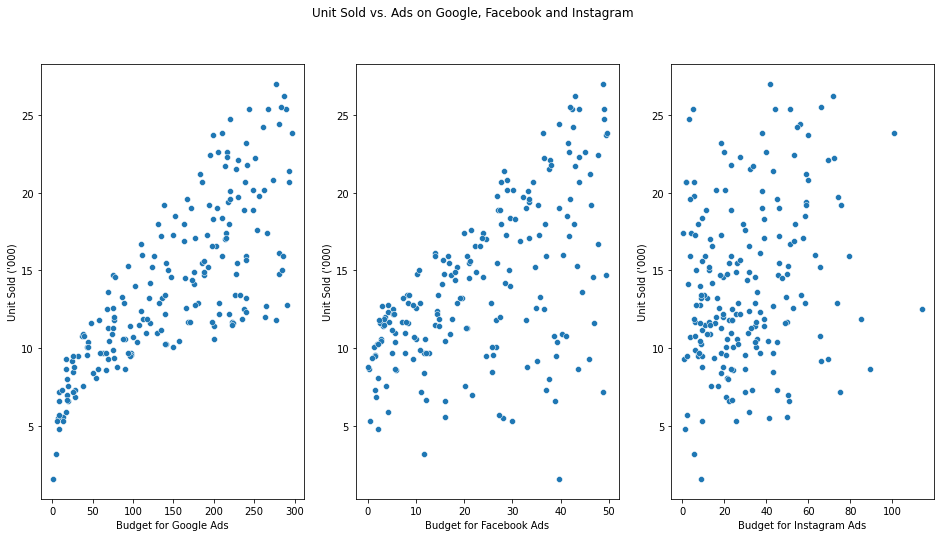

In [50]:
fig, axs = plt.subplots(1,3,figsize=(16,8),sharey=False)
ax1=sns.scatterplot(x='google',y='unit_sold',data=df,ax=axs[0])
ax1.set_ylabel('Unit Sold (\'000)')
ax1.set_xlabel('Budget for Google Ads')
ax2=sns.scatterplot(x='facebook',y='unit_sold',data=df,ax=axs[1])
ax2.set_ylabel('Unit Sold (\'000)')
ax2.set_xlabel('Budget for Facebook Ads')
ax3=sns.scatterplot(x='instagram',y='unit_sold',data=df,ax=axs[2])
ax3.set_ylabel('Unit Sold (\'000)')
ax3.set_xlabel('Budget for Instagram Ads')
plt.suptitle('Unit Sold vs. Ads on Google, Facebook and Instagram')
plt.savefig('Unit_Sold_vs_Ads.png')

Based on the graphs, it can be seen that google gives the best consistency in term of the higher the investment on ads, the higher the sales. As for facebook and instagram, the graphs are scattered, especially for invesment on instagram, where same amount of investment may give very different of sales. <br>
Google is with the better search engine, hence ads can reach to the users more accurately.

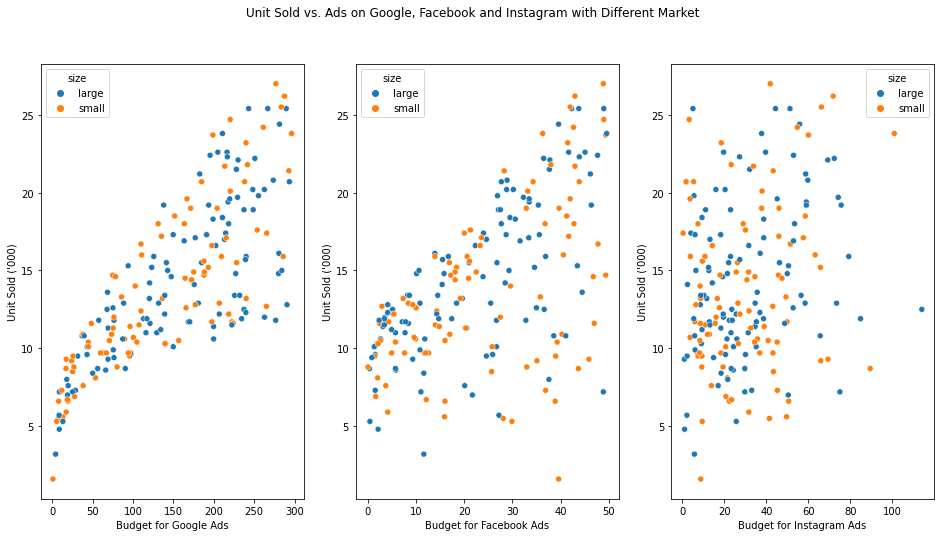

In [51]:
fig, axs = plt.subplots(1,3,figsize=(16,8),sharey=False)
ax1=sns.scatterplot(x='google',y='unit_sold',data=df,ax=axs[0],hue='size')
ax1.set_ylabel('Unit Sold (\'000)')
ax1.set_xlabel('Budget for Google Ads')
ax2=sns.scatterplot(x='facebook',y='unit_sold',data=df,ax=axs[1],hue='size')
ax2.set_ylabel('Unit Sold (\'000)')
ax2.set_xlabel('Budget for Facebook Ads')
ax3=sns.scatterplot(x='instagram',y='unit_sold',data=df,ax=axs[2],hue='size')
ax3.set_ylabel('Unit Sold (\'000)')
ax3.set_xlabel('Budget for Instagram Ads')
plt.suptitle('Unit Sold vs. Ads on Google, Facebook and Instagram with Different Market')
plt.savefig('Unit_Sold_vs_Ads_Size.png')

Based on the graphs, there is no significant different in term of the market size and the budget for the ads in google, facebook and facebook. Ads for both small and large markets showing sales trends that are about the same. 

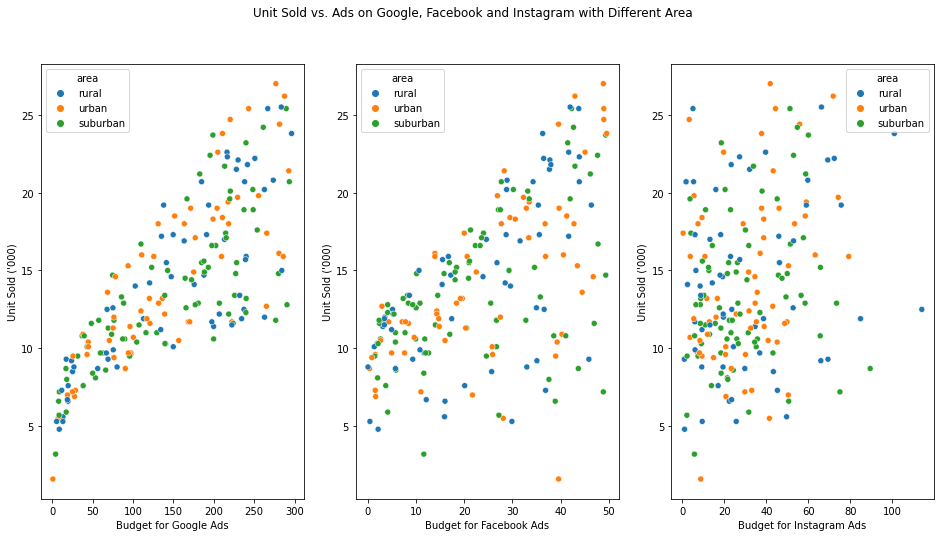

In [52]:
fig, axs = plt.subplots(1,3,figsize=(16,8),sharey=False)
ax1=sns.scatterplot(x='google',y='unit_sold',data=df,ax=axs[0],hue='area')
ax1.set_ylabel('Unit Sold (\'000)')
ax1.set_xlabel('Budget for Google Ads')
ax2=sns.scatterplot(x='facebook',y='unit_sold',data=df,ax=axs[1],hue='area')
ax2.set_ylabel('Unit Sold (\'000)')
ax2.set_xlabel('Budget for Facebook Ads')
ax3=sns.scatterplot(x='instagram',y='unit_sold',data=df,ax=axs[2],hue='area')
ax3.set_ylabel('Unit Sold (\'000)')
ax3.set_xlabel('Budget for Instagram Ads')
plt.suptitle('Unit Sold vs. Ads on Google, Facebook and Instagram with Different Area')
plt.savefig('Unit_Sold_vs_Ads_Area.png')

Again, similar with market size, area does not show any significant different in terms of the sales achieved based on budget allocated for the ads.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

columns = ['google','facebook','instagram','is_large','area_suburban', 'area_urban']
X = df[columns]
y = df['unit_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
model = LinearRegression()
model.fit(X,y)

print ('Coefficient: ', model.coef_)
print ('Intercept: ', model.intercept_)

Coefficient:  [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]
Intercept:  2.874190989087918


From the coefficient, it can be seen that google, facebook and area_urban play a major role in determining the unit sold (sales). <br>
As for the intercept value, it shows that there will be at least 2874 unit sold if the company did not allocate any budget for placing the ads.

In [49]:
print('Linear Regression Train Score is : {0:.2f}'.format(model.score(X_train, y_train)*100))
print('Linear Regression Test Score is : {0:.2f}'.format(model.score(X_test, y_test)*100))

Linear Regression Train Score is : 90.81
Linear Regression Test Score is : 86.32


Based on the result, the LinearRegression Model is able to predict the sales well with 86.32% prediction score. 